In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [44]:
import sqlite3

conn = sqlite3.connect('C:/Users/vlone/py-restaurant-data-analysis/db.sqlite3')

order = "SELECT * FROM restaurant_order"
order_data = pd.read_sql(order, conn)

product = "SELECT * FROM restaurant_product"
product_data = pd.read_sql(product, conn)

orderitem = "SELECT * FROM restaurant_orderitem"
orderitem_data = pd.read_sql(orderitem, conn)

combined_data = pd.merge(orderitem_data, order_data, left_on='order_id', right_on='id', suffixes=('_orderitem', '_order'))
combined_data = pd.merge(combined_data, product_data, left_on='product_id', right_on='id', suffixes=('_combined', '_product'))

combined_data.to_csv('combined_data.csv', index=False)

conn.close()

df = pd.read_csv('combined_data.csv')
print(df.head())
print(len(df))

   id_orderitem  quantity  order_id  product_id  id_order  \
0             1         2         1           6         1   
1             2         1         1         240         1   
2             3         1         1          19         1   
3             4         1         1          36         1   
4             5         1         1         111         1   

              datetime   id  price                 name  
0  2019-08-03 20:25:00    6   0.80        Plain Papadum  
1  2019-08-03 20:25:00  240  12.95     King Prawn Balti  
2  2019-08-03 20:25:00   19   2.95          Garlic Naan  
3  2019-08-03 20:25:00   36   3.95        Mushroom Rice  
4  2019-08-03 20:25:00  111   8.95  Paneer Tikka Masala  
74818


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

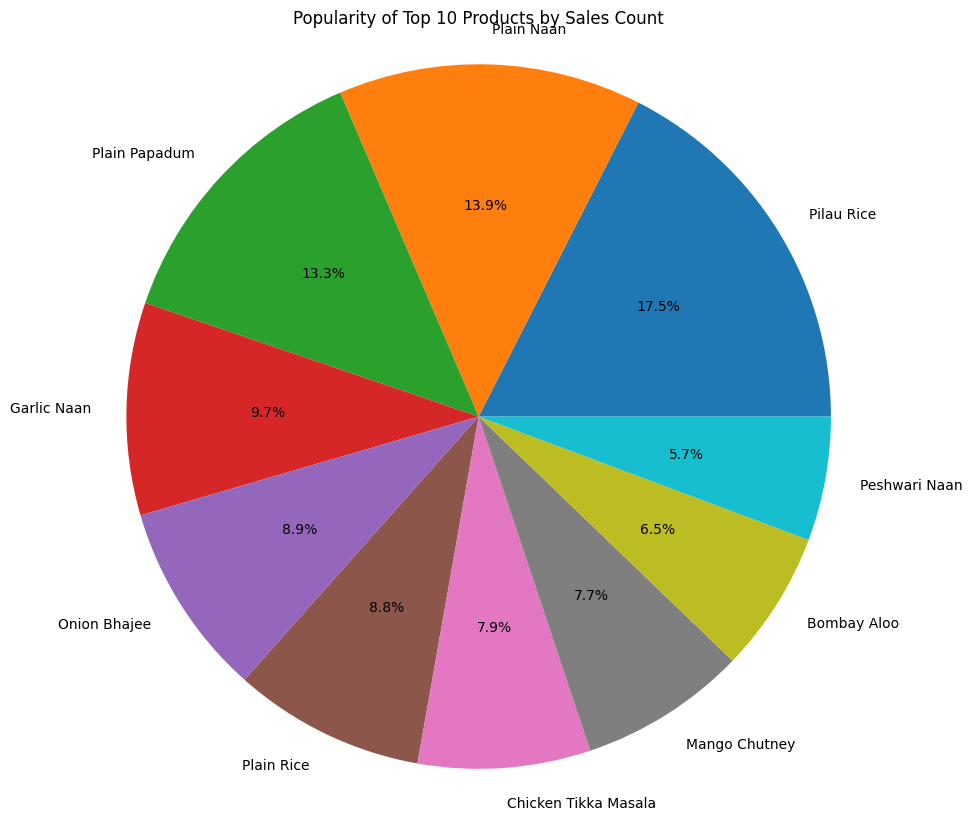

In [25]:
product_sales = df['name'].value_counts()
top_10_products = product_sales.head(10)
total_sales = top_10_products.sum()
top_10_products_percentage = (top_10_products / total_sales) * 100

plt.figure(figsize=(10, 10))
plt.pie(top_10_products_percentage, labels=top_10_products.index, autopct='%1.1f%%')
plt.title('Popularity of Top 10 Products by Sales Count')
plt.axis('equal')
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

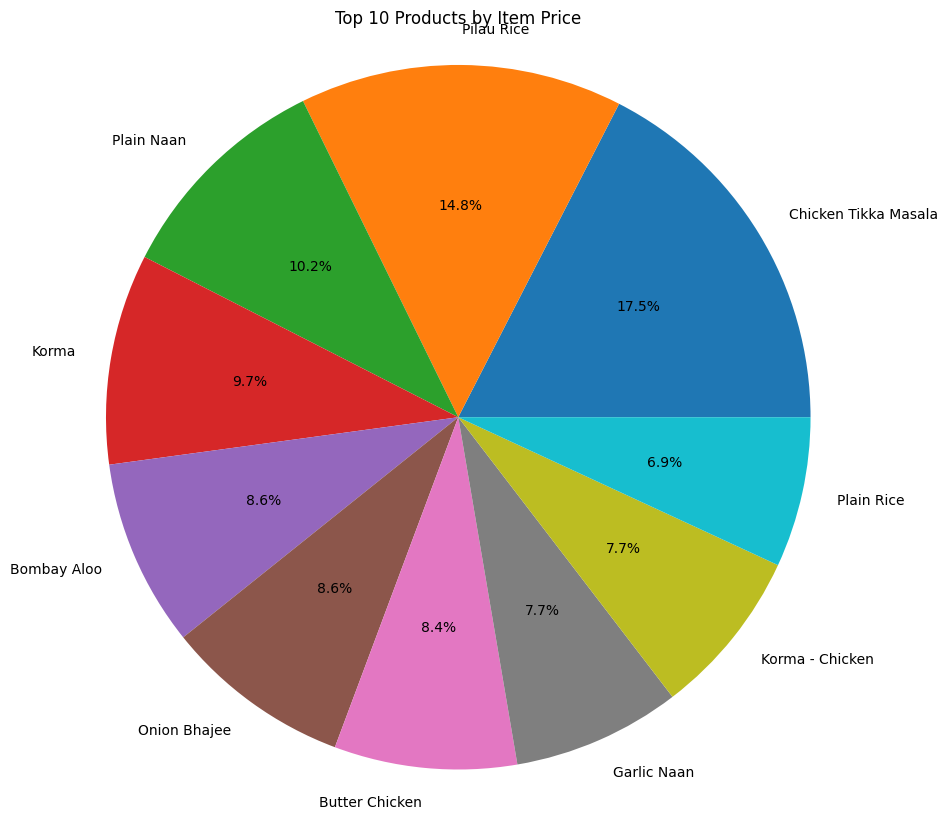

In [33]:
df['Item Price'] = df['price'] * df['quantity']
product_sales = df.groupby('name')['Item Price'].sum()
top_10_products = product_sales.nlargest(10)
total_sales = top_10_products.sum()
top_10_products_percentage = (top_10_products / total_sales) * 100

plt.figure(figsize=(10, 10))
plt.pie(top_10_products_percentage, labels=top_10_products.index, autopct='%1.1f%%')
plt.title('Top 10 Products by Item Price')
plt.axis('equal')
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

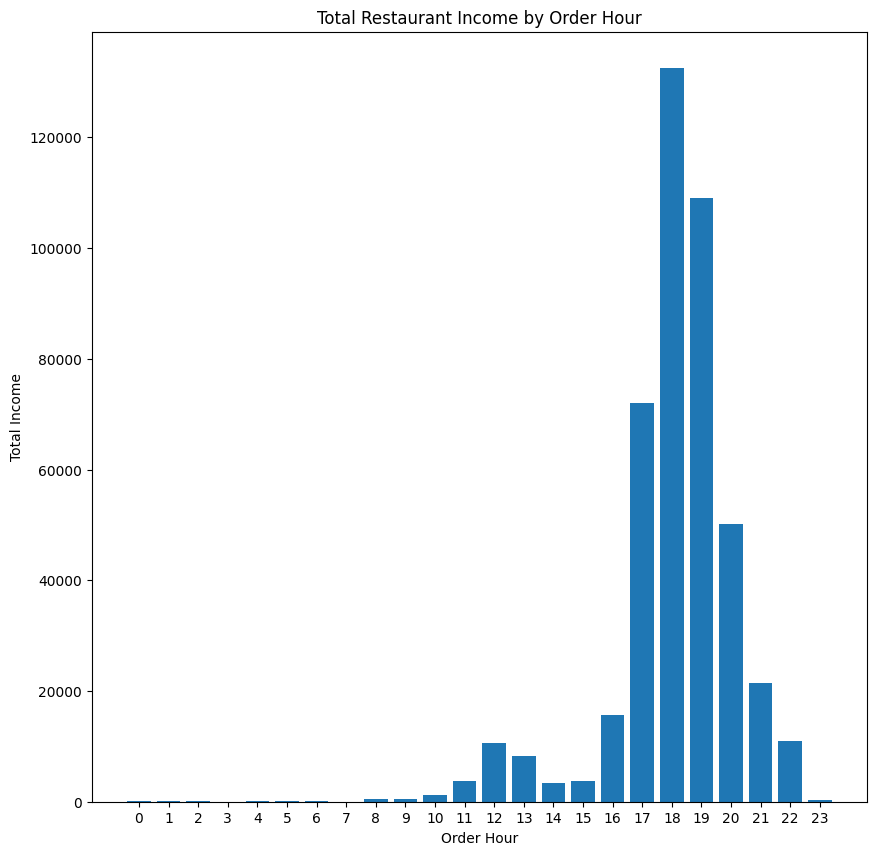

In [42]:
df['Order Datetime'] = pd.to_datetime(df['datetime'])
df['Order Hour'] = df['Order Datetime'].dt.hour

hourly_income = df.groupby('Order Hour')['Item Price'].sum()

plt.figure(figsize=(10, 10))
plt.bar(hourly_income.index, hourly_income.values)
plt.xlabel('Order Hour')
plt.ylabel('Total Income')
plt.title('Total Restaurant Income by Order Hour')
plt.xticks(range(24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

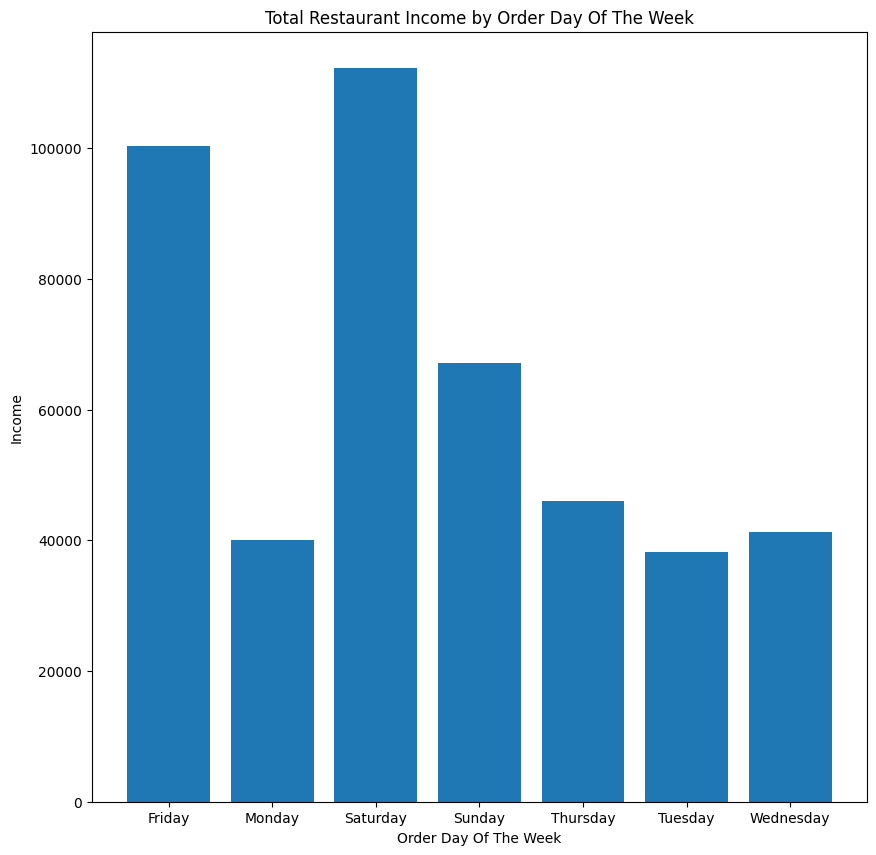

In [41]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['Order Day Of The Week'] = df['datetime'].dt.dayofweek

days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Order Day Of The Week'] = df['Order Day Of The Week'].map(days)

daily_income = df.groupby('Order Day Of The Week')['Item Price'].sum()

plt.figure(figsize=(10, 10))
plt.bar(daily_income.index, daily_income.values)
plt.xlabel('Order Day Of The Week')
plt.ylabel('Income')
plt.title('Total Restaurant Income by Order Day Of The Week')
plt.show()